https://www.kaggle.com/c/instacart-market-basket-analysis/data

'order_dow' is the day of week.

In [1]:
import os
import pandas as pd
import numpy as np
import zipfile


#libraries for data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
import seaborn as sns
#sns.set_palette('Set2')
#sns.set_color_codes("pastel")
sns.set(style="whitegrid", palette="colorblind", font_scale=1 )

In [2]:
folder = "/Users/reejungkim/Documents/instacart-market-basket-analysis"

os.listdir(folder)

['order_products__prior.csv.zip',
 '.DS_Store',
 'order_products__train.csv.zip',
 'aisles.csv.zip',
 'orders.csv.zip',
 'departments.csv.zip',
 'products.csv.zip',
 'sample_submission.csv.zip']

In [3]:

for file in os.listdir(folder):
    if file.endswith(".zip"):
        zip_file = folder + "/"+ file
        zf = zipfile.ZipFile(zip_file)
        
        x = str(file[:-8])
        print("\n"+ x)
        globals()[x] = pd.read_csv(zf.open(file[:-4])) #, index_col=0)

        display((globals()[x]).head())


order_products__prior


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0



order_products__train


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1



aisles


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation



orders


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0



departments


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol



products


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13



sample_submission


,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


# EDA

https://gist.github.com/goodvc78/3653c8f6a510f619d7ad6570111f38d8

In [4]:
def toReadable(v):
    value = round(v,2) if isinstance(v, float) else v

    if value < 1000:
        return str(value)
    elif value<1000000:
        return str(round(value/1000,1))+'K'
    elif value>=1000000:
        return str(round(value/1000000,1))+'M'
    return value

In [5]:

total_user = len(orders.user_id.unique())
total_order = len(orders)
total_ordered_product = len(order_products__prior)
unique_products = len(order_products__prior.product_id.unique())

print("total user = {}".format(toReadable(total_user)))
print("total order = {} ({} orders per a user )".format(toReadable(total_order), toReadable(total_order/total_user) ))
print("total product = ", toReadable(unique_products))
print("total ordered product  = {} ({} orders per a product )".format(
    toReadable(total_ordered_product), toReadable(total_ordered_product/unique_products) ))

total user = 206.2K
total order = 3.4M (16.59 orders per a user )
total product =  49.7K
total ordered product  = 32.4M (652.91 orders per a product )


In [6]:
index2day = "Sun Mon Tue Wed Thu Fri Sat".split()

In [7]:
index2day

['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


<AxesSubplot:ylabel='order_id'>

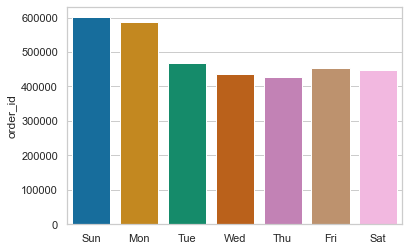

In [9]:
orders_per_dow = orders.pivot_table(index='order_dow',
                  values='order_id', 
                  aggfunc='count')

orders_per_dow.index = index2day
#orders_per_dow.reset_index(inplace=True)

orders_per_dow

sns.barplot(x=orders_per_dow.index, y="order_id", data=orders_per_dow)


sns.displot(orders, x="order_dow")

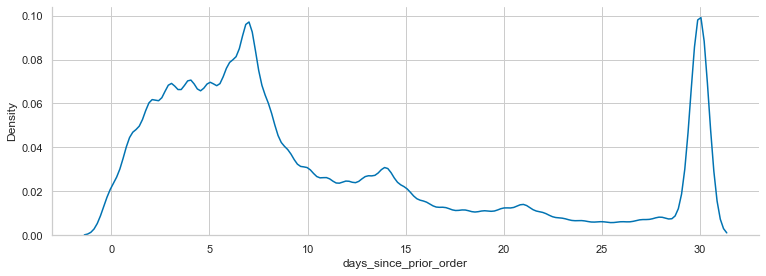

In [10]:
sns.displot(orders, x='days_since_prior_order', kind='kde', height=4, aspect=2.7)

In [11]:
orders_per_hod = orders.pivot_table(index='order_dow',
                    columns='order_hour_of_day',
                    values='order_id', 
                    aggfunc='count')  #aggfunc=lambda x: len(x)/1000)
    
orders_per_hod.index = index2day
orders_per_hod

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Sun,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
Mon,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
Tue,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
Wed,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
Thu,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
Fri,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
Sat,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


In [12]:
orders_per_hod = orders.pivot_table(index=['order_dow','order_hour_of_day'],
                    values='order_id', 
                    aggfunc='count')

orders_per_hod.reset_index(inplace=True)
orders_per_hod

,order_dow,order_hour_of_day,order_id
0,0,0,3936
1,0,1,2398
2,0,2,1409
3,0,3,963
4,0,4,813
...,...,...,...
163,6,19,18346
164,6,20,13392
165,6,21,10501
166,6,22,8532


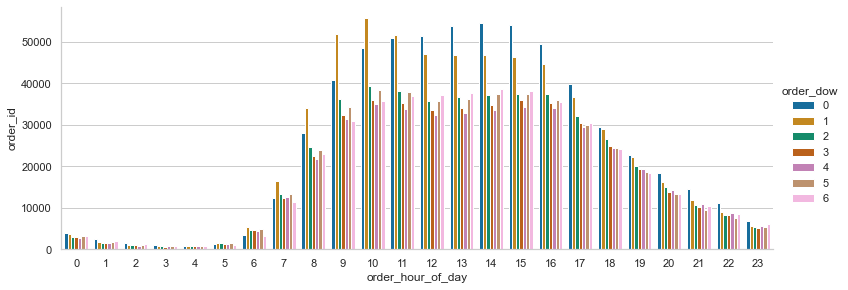

In [13]:
sns.catplot(x='order_hour_of_day', 
            y="order_id", 
            data=orders_per_hod, 
            hue='order_dow',
           kind='bar',
           height=4, aspect=2.7)

In [14]:
def drawWeekHour(ds, values,  aggfunc=len, title=None, figsize=(18,5) , cmap='YlGn'):
    weekhour_ds = ds.pivot_table(index='order_dow', columns='order_hour_of_day', values=values, aggfunc=aggfunc).fillna(0)
    weekhour_ds.index =  [  index2day[index] for index in weekhour_ds.index]
    sns.set(style="whitegrid", palette="colorblind", font_scale=1 )

    plt.figure(figsize=figsize)
    f = sns.heatmap(weekhour_ds, annot=True, fmt="1.1f", linewidths=.5, cmap=cmap) 
    plt.xlabel("Hour")
    plt.ylabel("Day of Week")
    if title:
        plt.title(title, fontsize=15)

### order quantity

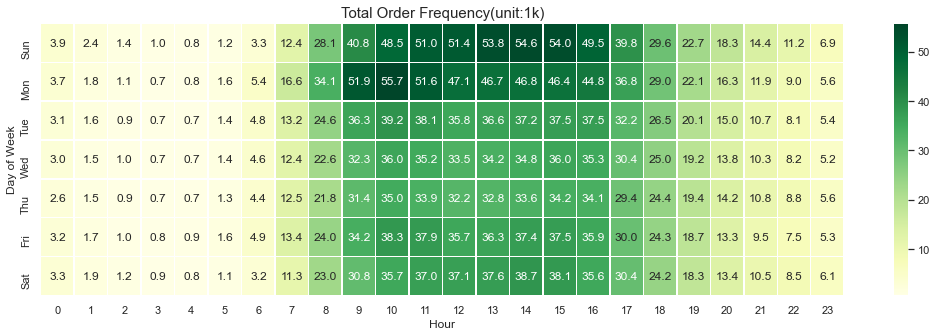

In [15]:
drawWeekHour(orders, values='order_id', title="Total Order Frequency(unit:1k)", aggfunc=lambda x: len(x)/1000)

### order per user

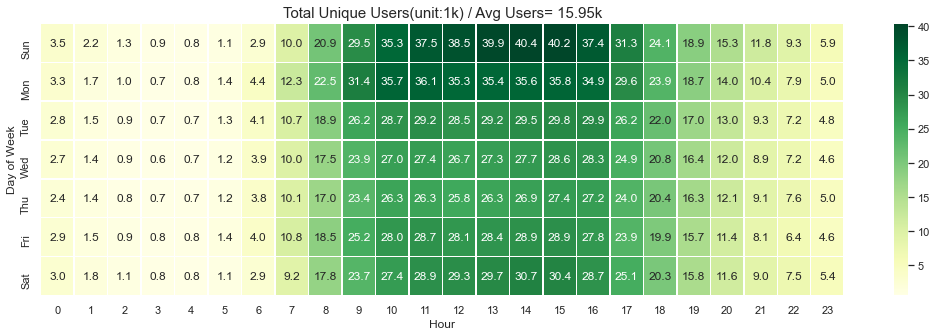

In [16]:
avg_users = round(orders.groupby(['order_dow','order_hour_of_day']).agg({'user_id':lambda x: len(x.unique())/1000}).mean().values[0],2)
drawWeekHour(orders, values='user_id', title="Total Unique Users(unit:1k) / Avg Users= {}k".format(avg_users), aggfunc=lambda x: len(x.unique())/1000)

### number of users (traffic)

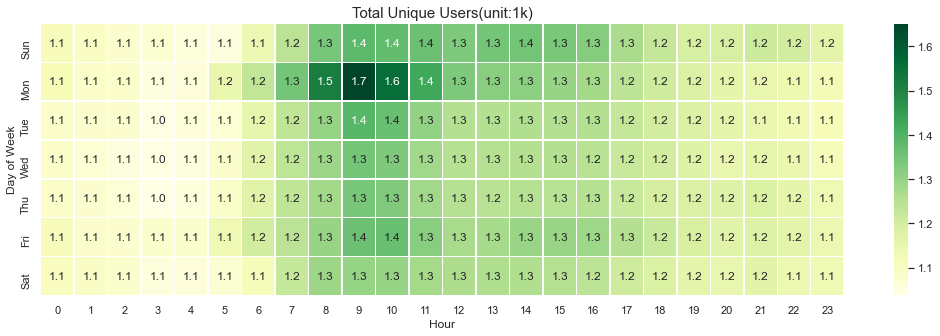

In [17]:
drawWeekHour(orders, values='user_id', title="Total Unique Users(unit:1k)"
             , aggfunc=lambda x: len(x)/len(x.unique()))

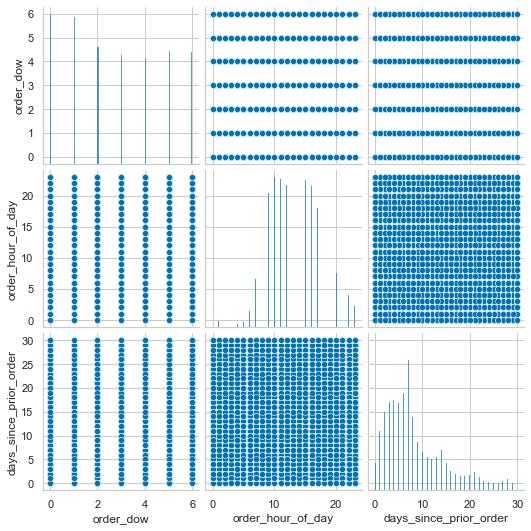

In [18]:
sns.pairplot(orders[['order_dow', 'order_hour_of_day', 'days_since_prior_order']])

In [19]:
order_products__prior.reordered.unique()#value_counts

array([1, 0])

## Merging data frames

In [20]:
df = order_products__prior.merge(orders, how='left', on='order_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,prior,3,5,9,8.0
1,2,28985,2,1,202279,prior,3,5,9,8.0
2,2,9327,3,0,202279,prior,3,5,9,8.0
3,2,45918,4,1,202279,prior,3,5,9,8.0
4,2,30035,5,0,202279,prior,3,5,9,8.0


In [21]:
df = df.merge(products, how='left', on='product_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13


df.product_name.value_counts

In [22]:
df = df.merge(departments, how='left', on='department_id')
df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,department
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,dairy eggs
1,2,28985,2,1,202279,prior,3,5,9,8.0,Michigan Organic Kale,83,4,produce
2,2,9327,3,0,202279,prior,3,5,9,8.0,Garlic Powder,104,13,pantry
3,2,45918,4,1,202279,prior,3,5,9,8.0,Coconut Butter,19,13,pantry
4,2,30035,5,0,202279,prior,3,5,9,8.0,Natural Sweetener,17,13,pantry


### days taken to reorder product per product department type

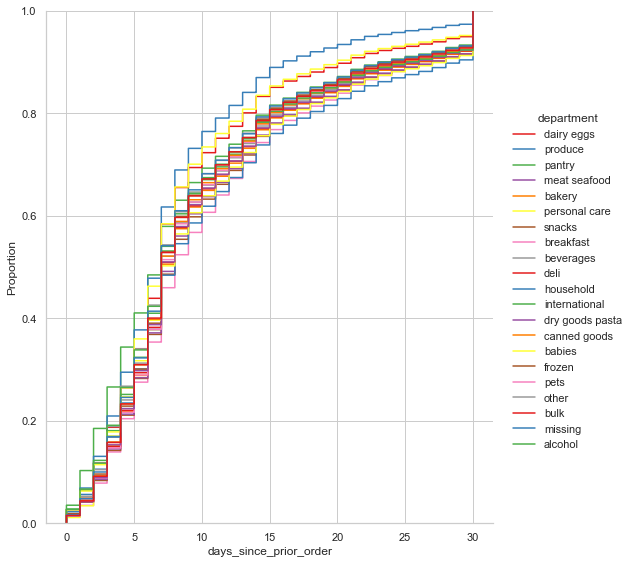

In [23]:
sns.displot(df.loc[df.reordered==1], x='days_since_prior_order', hue='department', kind="ecdf", 
            height=8, aspect=.9, palette='Set1')

In [24]:
days_per_department = (df.loc[df.reordered==1]).pivot_table(index='department', values='days_since_prior_order', aggfunc=np.mean)
days_per_department.sort_values(ascending=True, by='days_since_prior_order')

,days_since_prior_order
department,
missing,8.170217
babies,9.057595
bulk,9.117594
alcohol,9.324528
other,9.915372
produce,9.962377
pantry,10.039937
international,10.136356
snacks,10.146448


df.pivot_table(index='department', values=['add_to_cart_order', 'reordered'],aggfunc=np.sum, margins=True )

In [25]:
pd.DataFrame(df.groupby('order_id').department.agg(lambda x: x.tolist())).reset_index()


,order_id,department
0,2,"[dairy eggs, produce, pantry, pantry, pantry, ..."
1,3,"[dairy eggs, dairy eggs, produce, produce, dai..."
2,4,"[bakery, personal care, snacks, breakfast, bre..."
3,5,"[produce, pantry, deli, produce, dairy eggs, h..."
4,6,"[beverages, household, household]"
...,...,...
3214869,3421079,[personal care]
3214870,3421080,"[dairy eggs, frozen, beverages, produce, produ..."
3214871,3421081,"[snacks, bakery, pantry, dairy eggs, canned go..."
3214872,3421082,"[meat seafood, dairy eggs, produce, produce, d..."


In [28]:
basket = pd.crosstab(df['order_id'], df['department'])
basket

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,5,0,0,3,0
3,0,0,1,0,0,0,0,3,0,0,...,0,0,1,0,0,0,0,0,3,0
4,0,0,1,3,4,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4
5,0,0,0,1,0,0,0,3,1,2,...,3,1,1,0,0,2,1,0,7,4
6,0,0,0,1,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3421080,0,0,0,1,0,0,0,5,0,0,...,0,0,0,0,0,0,0,0,2,0
3421081,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
#return 0 when item was not purchase and 1 when item was purchased
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)
basket_sets

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
order_id,,,,,,,,,,,,,,,,,,,,,
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
5,0,0,0,1,0,0,0,1,1,1,...,1,1,1,0,0,1,1,0,1,1
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421079,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3421080,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3421081,0,0,1,1,0,0,1,1,1,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:
#!conda install mlxtend --channel conda-forge
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [32]:
frequent_itemsets = apriori(basket_sets, 
                            min_support=0.07, 
                            use_colnames=True)

In [33]:
frequent_itemsets

,support,itemsets
0,0.274212,(bakery)
1,0.453315,(beverages)
2,0.163362,(breakfast)
3,0.211923,(canned goods)
4,0.677270,(dairy eggs)
...,...,...
190,0.129319,"(snacks, dairy eggs, produce, pantry)"
191,0.083344,"(snacks, produce, frozen, pantry)"
192,0.082453,"(frozen, produce, snacks, beverages, dairy eggs)"
193,0.075031,"(pantry, produce, snacks, beverages, dairy eggs)"


In [34]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=.05)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beverages),(bakery),0.453315,0.274212,0.140329,0.309561,1.128912,0.016024,1.051198
1,(bakery),(beverages),0.274212,0.453315,0.140329,0.511753,1.128912,0.016024,1.119689
2,(canned goods),(bakery),0.211923,0.274212,0.079820,0.376645,1.373555,0.021708,1.164325
3,(bakery),(canned goods),0.274212,0.211923,0.079820,0.291088,1.373555,0.021708,1.111671
4,(dairy eggs),(bakery),0.677270,0.274212,0.224997,0.332212,1.211517,0.039282,1.086855


In [36]:
rules[ (rules['lift'] >= 1.0) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(bakery),(dairy eggs),0.274212,0.677270,0.224997,0.820524,1.211517,0.039282,1.798180
15,(bakery),(produce),0.274212,0.749429,0.228968,0.835004,1.114187,0.023466,1.518651
41,(breakfast),(dairy eggs),0.163362,0.677270,0.135077,0.826858,1.220869,0.024437,1.863963
47,(breakfast),(produce),0.163362,0.749429,0.131847,0.807086,1.076935,0.009419,1.298875
50,(canned goods),(dairy eggs),0.211923,0.677270,0.169985,0.802108,1.184325,0.026456,1.630836
...,...,...,...,...,...,...,...,...,...
1115,"(beverages, dairy eggs, frozen, snacks)",(produce),0.094738,0.749429,0.082453,0.870323,1.161314,0.011453,1.932263
1142,"(beverages, snacks, produce, pantry)",(dairy eggs),0.085464,0.677270,0.075031,0.877924,1.296269,0.017149,2.643680
1145,"(beverages, snacks, dairy eggs, pantry)",(produce),0.085204,0.749429,0.075031,0.880603,1.175032,0.011177,2.098644
1172,"(snacks, produce, frozen, pantry)",(dairy eggs),0.083344,0.677270,0.074244,0.890811,1.315297,0.017797,2.955710
